# Vizualize Diff of contexts
* For all of the metrics one by one

In [1]:
import os
os.chdir('./data')

In [2]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib

import pandas as pd
import seaborn as sns
from glob import glob
from tabulate import tabulate
from IPython.display import Latex, display_html, display, HTML

## load daa

In [3]:
AUC = pd.read_csv('AUC_mean_noface.csv', index_col=[0])
AUC_f03 = pd.read_csv('AUC_mean_face_03.csv', index_col=[0])
AUC_f05 = pd.read_csv('AUC_mean_face_05.csv', index_col=[0])
AUC_f07 = pd.read_csv('AUC_mean_face_07.csv', index_col=[0])

### Calculate means

In [4]:
def calc_means(df):
    df = df.transpose()
    df['mean model'] = df.mean(axis=1)
    df = df.transpose()
    df['mean context'] = df.mean(axis=1)
    return df

In [5]:
# AUC = calc_means(AUC)
# AUC_f03 = calc_means(AUC_f03)
# AUC_f05 = calc_means(AUC_f05)
# AUC_f07 = calc_means(AUC_f07)

In [6]:
AUC0 = AUC.loc[['aim', 'cas', 'covsal', 'gbvs', 'icf', 'ik', 'sun']]
AUC0

,all,person,no person,animal,sports,electronic
aim,0.667399,0.675930,0.651460,0.658173,0.702019,0.660210
cas,0.694740,0.705537,0.674566,0.688424,0.743562,0.681332
covsal,0.743704,0.748337,0.735049,0.749722,0.755804,0.738809
gbvs,0.749366,0.756851,0.735382,0.754977,0.780210,0.744469
icf,0.714083,0.724809,0.694044,0.707857,0.742238,0.706599
ik,0.656940,0.669288,0.633871,0.656090,0.692848,0.657036
sun,0.624444,0.625526,0.622424,0.592391,0.633091,0.624564


In [7]:
AUC_f07

,all,person,no person,animal,sports,electronic
aim,0.674163,0.686218,0.651640,0.660701,0.705678,0.668927
cas,0.701140,0.715308,0.674669,0.690495,0.746190,0.689888
covsal,0.749089,0.756504,0.735235,0.752197,0.759735,0.746879
gbvs,0.752909,0.762269,0.735422,0.756329,0.782433,0.749367
icf,0.716903,0.729096,0.694122,0.709061,0.744237,0.710843
ik,0.664329,0.680528,0.634062,0.659037,0.696871,0.666733
sun,0.634122,0.640278,0.622619,0.596435,0.639483,0.637194


In [8]:
AUC_diff_f03 = ((AUC_f03 - AUC0) / AUC0)*100
AUC_diff_f05 = ((AUC_f05 - AUC0) / AUC0)*100
AUC_diff_f07 = ((AUC_f07 - AUC0) / AUC0)*100

In [9]:
AUC_diff_f03

,all,person,no person,animal,sports,electronic
aim,0.783813,1.177888,0.019894,0.281267,0.373542,0.993967
cas,0.574155,0.862742,0.010224,0.181548,0.220191,0.787535
covsal,0.415629,0.630110,0.007665,0.190300,0.266285,0.620119
gbvs,0.344384,0.519775,0.007128,0.126971,0.193486,0.473454
icf,0.232046,0.345760,0.010174,0.079949,0.138835,0.346482
ik,0.818165,1.221709,0.022087,0.304310,0.389794,1.054632
sun,1.112389,1.692031,0.024029,0.477456,0.679932,1.460600


In [10]:
AUC_diff_f03 = calc_means(AUC_diff_f03)
AUC_diff_f05 = calc_means(AUC_diff_f05)
AUC_diff_f07 = calc_means(AUC_diff_f07)

In [11]:
AUC_diff_f07

,all,person,no person,animal,sports,electronic,mean context
aim,1.013429,1.522007,0.027546,0.384049,0.521242,1.320377,0.798108
cas,0.921236,1.384828,0.015327,0.300871,0.353451,1.255835,0.705258
covsal,0.724039,1.091365,0.025345,0.330187,0.520102,1.092266,0.630551
gbvs,0.472847,0.715871,0.005540,0.179109,0.285026,0.657870,0.386044
icf,0.394886,0.591507,0.011251,0.170070,0.269361,0.600517,0.339598
ik,1.124648,1.679473,0.030135,0.449221,0.580641,1.475882,0.890000
sun,1.549747,2.358424,0.031344,0.682735,1.009596,2.022259,1.275684
mean model,0.885833,1.334782,0.020927,0.356606,0.505631,1.203572,0.717892


In [12]:
mean_context_diff_f03 = AUC_diff_f03.transpose().loc['mean context']
mean_context_diff_f05 = AUC_diff_f05.transpose().loc['mean context']
mean_context_diff_f07 = AUC_diff_f07.transpose().loc['mean context']

mean_context_diff = pd.DataFrame([mean_context_diff_f03, 
                            mean_context_diff_f05,
                            mean_context_diff_f07], index=[0.3,0.5,0.7])

mean_context_diff = mean_context_diff.transpose()
mean_context_diff

,0.3,0.5,0.7
aim,0.605062,0.701015,0.798108
cas,0.439399,0.614658,0.705258
covsal,0.355018,0.485883,0.630551
gbvs,0.277533,0.354352,0.386044
icf,0.192208,0.257288,0.339598
ik,0.635116,0.782636,0.890000
sun,0.907739,1.145789,1.275684
mean model,0.487439,0.620231,0.717892


In [19]:
mean_context_diff = mean_context_diff.loc[['aim', 'cas', 'covsal', 'gbvs', 'icf', 'ik', 'sun']]
mean_context_diff.index = mean_context_diff.index.str.upper()

KeyError: "None of [Index(['aim', 'cas', 'covsal', 'gbvs', 'icf', 'ik', 'sun'], dtype='object')] are in the [index]"

In [22]:
matplotlib.rcParams.update({'font.size': 27})

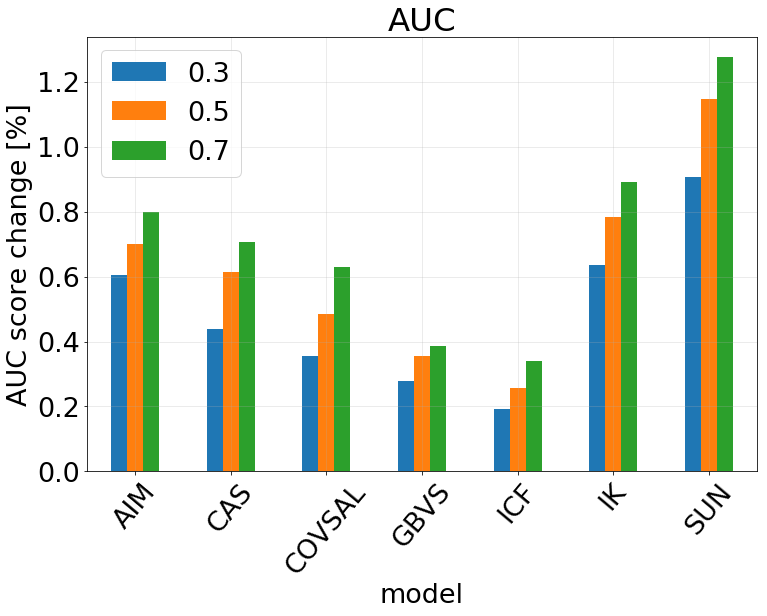

In [23]:
fig, ax = plt.subplots(figsize=(12, 8));
mean_context_diff.plot.bar(ax=ax);
plt.grid(alpha=0.3)
plt.title('AUC')
plt.ylabel('AUC score change [%]');
plt.xlabel('model')
plt.xticks(rotation=50)
# plt.legend(ncol=3)

plt.savefig('../plots/AUC_improvment_mean_contexts.png', bbox_inches='tight', pad_inches=0)

In [24]:
mean_model_diff_f03 = AUC_diff_f03.loc['mean model']
mean_model_diff_f05 = AUC_diff_f05.loc['mean model']
mean_model_diff_f07 = AUC_diff_f07.loc['mean model']

mean_models_diff = pd.DataFrame([mean_model_diff_f03, 
                            mean_model_diff_f05,
                            mean_model_diff_f07], index=[0.3,0.5,0.7])

mean_models_diff = mean_models_diff.transpose()
mean_models_diff

,0.3,0.5,0.7
all,0.611511,0.774420,0.885833
person,0.921430,1.167769,1.334782
no person,0.014457,0.016678,0.020927
animal,0.234543,0.299798,0.356606
sports,0.323152,0.423649,0.505631
electronic,0.819541,1.039075,1.203572
mean context,0.487439,0.620231,0.717892


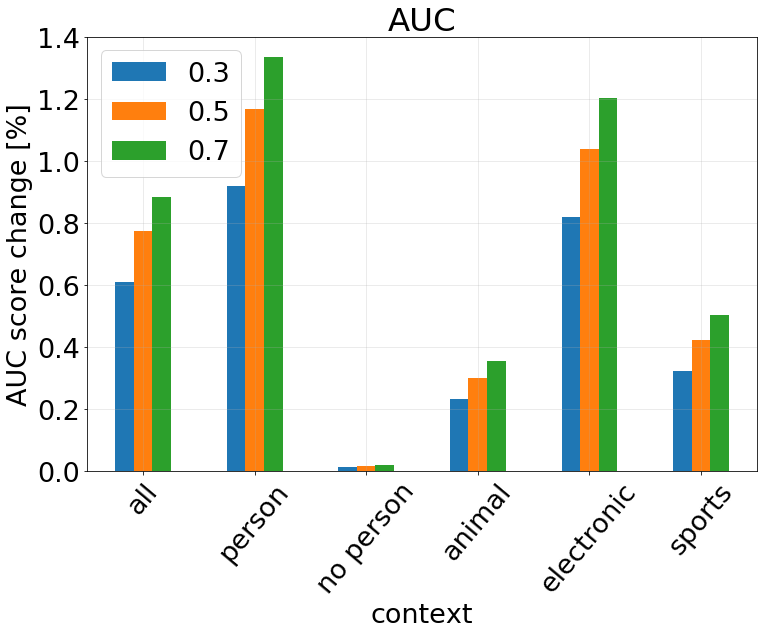

In [25]:
mean_models_diff = mean_models_diff.loc[['all', 'person', 'no person', 'animal', 'electronic', 'sports']]

fig, ax = plt.subplots(figsize=(12, 8));
mean_models_diff.plot.bar(ax=ax);

plt.grid(alpha=0.3)

plt.title('AUC')
plt.ylabel('AUC score change [%]');
plt.xlabel('context')
plt.xticks(rotation=50)
# plt.legend(ncol=3)

plt.savefig('../plots/AUC_improvment_mean_model.jpg', bbox_inches='tight', pad_inches=0)